In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx
import glob
import re
import matplotlib.dates as mdates
import scipy.stats
import warnings
from sklearn import linear_model
import logging


from Functions import get_distance_matrix, reg

# Suppress all warnings
warnings.filterwarnings('ignore')

In [4]:
Uncleaned_Data_Price = pd.read_csv("DATA/MENA_PRICE_5Y.csv", index_col='Date')

cleaned_Data_Price = Uncleaned_Data_Price.dropna(axis=1)
cleaned_Data_Price

,BROG,GMS,NETW,EMIRATES,ARMX,IHC,DIC,FAB,TAQA,AIRARABI,...,TIJARA,QOIS,RAKWCT,BBK,PHTV,ALMANAR,KBT,NBB,EGSA,UPAC
Date,,,,,,,,,,,,,,,,,,,,,
06/03/2019,10.12,6.09,557.0,8.41,3.71,0.97,0.94,11.82,0.73,0.78,...,37.53,0.52,0.88,0.24,16.92,31.91,39.55,0.36,3.37,14.47
06/04/2019,10.13,5.98,550.0,8.41,3.71,0.97,0.94,11.82,0.73,0.78,...,37.53,0.52,0.88,0.24,16.92,31.91,39.55,0.36,3.37,14.47
06/05/2019,10.13,5.43,554.0,8.41,3.71,0.97,0.94,11.82,0.73,0.78,...,37.53,0.52,0.88,0.24,16.92,31.91,39.55,0.36,3.37,14.47
06/06/2019,10.13,5.45,555.0,8.41,3.71,0.97,0.94,11.82,0.73,0.78,...,37.53,0.52,0.88,0.24,16.92,31.91,39.55,0.36,3.37,14.47
06/07/2019,10.13,5.73,558.0,8.41,3.71,0.97,0.94,11.82,0.73,0.78,...,37.53,0.52,0.88,0.24,16.92,31.91,39.55,0.36,3.37,14.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/28/2024,1.01,19.40,392.8,15.60,2.66,399.50,2.11,11.58,2.59,2.41,...,60.00,0.82,1.08,0.51,137.00,63.90,61.40,0.54,6.61,133.00
5/29/2024,1.01,20.10,392.6,15.45,2.64,399.50,2.08,11.64,2.59,2.36,...,60.00,0.81,1.08,0.51,137.00,61.00,61.40,0.55,6.39,129.00
5/30/2024,0.96,20.00,392.0,15.70,2.69,399.50,2.13,11.78,2.59,2.34,...,59.80,0.81,1.10,0.51,137.00,62.40,61.50,0.55,6.39,137.00


Selecting a pair to trade

In [5]:
Stock_1 = cleaned_Data_Price["DIB "]
Stock_2 = cleaned_Data_Price["MABANEE "]

In [6]:
def Sell(Stock, Amount):
      return print(f"Sell {Amount} of {Stock}")

def Buy(Stock, Amount):
      return print(f"Buy {Amount} of {Stock}")

#Trading_Pair = ["A","E"]
threshold = 1
spread = reg(Stock_1, Stock_2)
mean = np.mean(spread)
std = np.std(spread)
ratio = Stock_1 / Stock_2

if spread[-1] > mean + threshold * std:
        Sell(Stock_2, 100) 
        Buy(Stock_1,  ratio * 100)
    
elif spread[-1] < mean - threshold * std:
    Sell(Stock_1, 100)
    Buy(Stock_2, ratio * 100) 

Sell 100 of Date
06/03/2019    478.41
06/04/2019    478.41
06/05/2019    478.41
06/06/2019    478.41
06/07/2019    478.41
               ...  
5/28/2024     830.00
5/29/2024     840.00
5/30/2024     830.00
5/31/2024     830.00
06/01/2024    830.00
Name: MABANEE , Length: 1826, dtype: float64
Buy Date
06/03/2019    0.775485
06/04/2019    0.775485
06/05/2019    0.775485
06/06/2019    0.775485
06/07/2019    0.775485
                ...   
5/28/2024     0.671084
5/29/2024     0.655952
5/30/2024     0.672289
5/31/2024     0.665060
06/01/2024    0.665060
Length: 1826, dtype: float64 of Date
06/03/2019    3.71
06/04/2019    3.71
06/05/2019    3.71
06/06/2019    3.71
06/07/2019    3.71
              ... 
5/28/2024     5.57
5/29/2024     5.51
5/30/2024     5.58
5/31/2024     5.52
06/01/2024    5.52
Name: DIB , Length: 1826, dtype: float64


In [17]:
import numpy as np

# Assuming `spread` and `reg` are defined elsewhere in the code
# from some_module import spread, reg

class PairsTradingStrategy:
    def __init__(self, stock1, stock2, threshold=1):
        self.stock1 = stock1
        self.stock2 = stock2
        self.threshold = threshold
        self.spread = reg(stock1, stock2)
        self.mean = np.mean(self.spread)
        self.std = np.std(self.spread)
        self.ratio = stock1 / stock2

    def execute_trade(self):
        current_spread = self.spread[-1]
        if current_spread > self.mean + self.threshold * self.std:
            self.sell(self.stock2, 100)
            self.buy(self.stock1, self.ratio[-1] * 100)
        elif current_spread < self.mean - self.threshold * self.std:
            self.sell(self.stock1, 100)
            self.buy(self.stock2, self.ratio[-1] * 100)

    def sell(self, stock, amount):
        # Placeholder for actual sell logic
        print(f"Sell {amount} of {stock.name}")

    def buy(self, stock, amount):
        # Placeholder for actual buy logic
        print(f"Buy {amount} of {stock.name}")

# Assuming cleaned_Data_Price is a DataFrame or a dictionary containing the stock price series
stock1 = cleaned_Data_Price["DIB "]
stock2 = cleaned_Data_Price["MABANEE "]

strategy = PairsTradingStrategy(stock1, stock2)
strategy.execute_trade()


Sell 100 of MABANEE 
Buy 0.6650602409638553 of DIB 


Generalised version of the above

2.5900177706567508e-14
2
Open lower position  [('sell', 'DIB ', 100, 0), ('buy', 'MABANEE ', 0.7754854622604043, 0)]
6
Open lower position  [('sell', 'DIB ', 100, 0), ('buy', 'MABANEE ', 0.7754854622604043, 0), ('buy', 'DIB ', 100, 38), ('sell', 'MABANEE ', -0.7754854622604043, 38), ('sell', 'DIB ', 100, 98), ('buy', 'MABANEE ', 0.7491776159418913, 98)]
10
Open upper position  [('sell', 'DIB ', 100, 0), ('buy', 'MABANEE ', 0.7754854622604043, 0), ('buy', 'DIB ', 100, 38), ('sell', 'MABANEE ', -0.7754854622604043, 38), ('sell', 'DIB ', 100, 98), ('buy', 'MABANEE ', 0.7491776159418913, 98), ('buy', 'DIB ', 100, 169), ('sell', 'MABANEE ', -0.7491776159418913, 169), ('sell', 'MABANEE ', 100, 204), ('buy', 'DIB ', 0.6430102405334602, 204)]
14
Open lower position  [('sell', 'DIB ', 100, 0), ('buy', 'MABANEE ', 0.7754854622604043, 0), ('buy', 'DIB ', 100, 38), ('sell', 'MABANEE ', -0.7754854622604043, 38), ('sell', 'DIB ', 100, 98), ('buy', 'MABANEE ', 0.7491776159418913, 98), ('buy', 'DIB ',

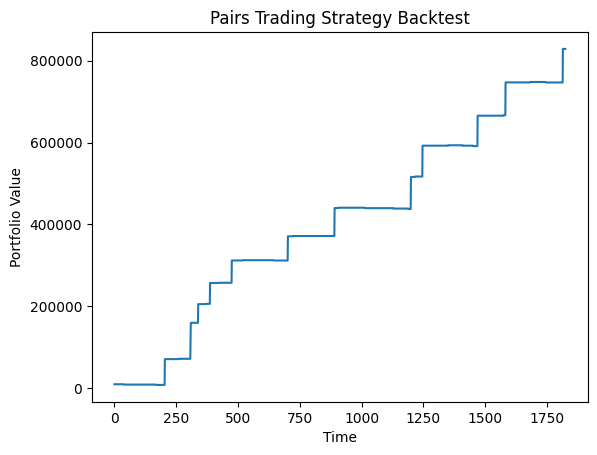

In [19]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt





class PairsTradingStrategy:



    #Initialise the variables
    def __init__(self, stock1_name, stock2_name, stock1_prices, stock2_prices, threshold=1):
        self.stock1_name = stock1_name
        self.stock2_name = stock2_name
        self.stock1_prices = stock1_prices
        self.stock2_prices = stock2_prices
        self.threshold = threshold
        self.spread = self.calculate_spread(stock1_prices, stock2_prices)
        self.mean = np.mean(self.spread)
        self.std = np.std(self.spread)
        self.ratio = stock1_prices / stock2_prices
        self.positions = []
        self.cumulative_return = []
        self.portfolio_value = []
        self.open_positions = {stock1_name: 0, stock2_name: 0}

        print(self.mean)

        

    def calculate_spread(self, stock1_prices, stock2_prices):
        # Perform linear regression to calculate the spread
        X = stock1_prices.reshape(-1, 1)
        y = stock2_prices
        model = LinearRegression().fit(X, y)
        predicted = model.predict(X)
        spread = stock2_prices - predicted
        return spread
    
    

    def execute_trade(self, i):

        current_spread = self.spread[i]
        
        
        if current_spread > self.mean + self.threshold * self.std:
            if self.open_positions[self.stock1_name] <= 0 and self.open_positions[self.stock2_name] >= 0:
                self.positions.append(('sell', self.stock2_name, 100, i))
                self.positions.append(('buy', self.stock1_name, self.ratio[i] * 100, i))
                self.open_positions[self.stock1_name] += 100
                self.open_positions[self.stock2_name] -= self.ratio[i] * 100

                ###debugging####
                print(len(self.positions))
                print(f"Open upper position  {self.positions}")

        elif current_spread < self.mean - self.threshold * self.std:
            if self.open_positions[self.stock1_name] >= 0 and self.open_positions[self.stock2_name] <= 0:
                self.positions.append(('sell', self.stock1_name, 100, i))
                self.positions.append(('buy', self.stock2_name, self.ratio[i] * 100, i))
                self.open_positions[self.stock1_name] -= 100
                self.open_positions[self.stock2_name] += self.ratio[i] * 100


                ##DEBUGGING###
                print(len(self.positions))
                print(f"Open lower position  {self.positions}")
        


        #This condition checks if the absolute difference between the current spread and the mean spread is less than 10% of the standard deviation 
        # of the spread.
        #  This indicates a condition where the spread has reverted close to its mean, suggesting a potential closing point for open trades.
        # Close positions when the spread reverts to the mean
        elif abs(current_spread - self.mean) < 0.1 * self.std:
            if self.open_positions[self.stock1_name] > 0:
                self.positions.append(('sell', self.stock1_name, self.open_positions[self.stock1_name], i))
                self.positions.append(('buy', self.stock2_name, self.open_positions[self.stock2_name], i))
                self.open_positions[self.stock1_name] = 0
                self.open_positions[self.stock2_name] = 0

            # If there is a long position (positive quantity) in stock1, it executes a sell order for stock1 and a corresponding buy order for stock2 to close the position.
            # It appends these actions to self.positions, recording the trade type ('sell' or 'buy'), the stock name, the quantity, and the index i.
            # It then sets the open positions for both stocks to 0, indicating that the positions have been closed.


            elif self.open_positions[self.stock1_name] < 0:
                self.positions.append(('buy', self.stock1_name, -self.open_positions[self.stock1_name], i))
                self.positions.append(('sell', self.stock2_name, -self.open_positions[self.stock2_name], i))
                self.open_positions[self.stock1_name] = 0
                self.open_positions[self.stock2_name] = 0
            #opposite to the above - if there is a short position on stcok 1, close...

    def backtest(self):
        initial_capital = 10000  # Starting with $10,000
        portfolio_value = initial_capital

        #initialise portfolio return
        cumulative_returns = [0]

        for i in range(len(self.stock1_prices)):
            self.execute_trade(i)

            # Calculate current portfolio value
            current_value = portfolio_value
            
            for position in self.positions:
                action, stock_name, amount, idx = position
                if stock_name == self.stock1_name:
                    price = self.stock1_prices[idx]
                elif stock_name == self.stock2_name:
                    price = self.stock2_prices[idx]

                if action == 'sell':
                    current_value += amount * price
                    #print(f"current_value sell {self.portfolio_value}")

                elif action == 'buy':
                    current_value -= amount * price
                    #print(f"current_value buy {self.portfolio_value}")
            self.portfolio_value.append(current_value)
            
            
        return self.portfolio_value 


# Example usage:

stock1_name = "DIB "
stock2_name = "MABANEE "
stock1_prices = np.array(cleaned_Data_Price[stock1_name])
stock2_prices = np.array(cleaned_Data_Price[stock2_name])

strategy = PairsTradingStrategy(stock1_name, stock2_name, stock1_prices, stock2_prices)
portfolio_values = strategy.backtest()

# Convert portfolio values to a pandas DataFrame for analysis
portfolio_df = pd.DataFrame(portfolio_values, columns=['Portfolio Value'])

# Plot the portfolio value over time
plt.plot(portfolio_df)
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.title('Pairs Trading Strategy Backtest')
plt.show()


With spread and cumulative return

{'DIB ': -100, 'MABANEE ': 0.7754854622604043}
{'DIB ': -100, 'MABANEE ': 0.7491776159418913}
{'DIB ': 100, 'MABANEE ': -0.6430102405334602}
{'DIB ': -100, 'MABANEE ': 0.7589454652482865}
{'DIB ': 0, 'MABANEE ': 0.19615806619541665}
{'DIB ': 100, 'MABANEE ': -0.38493136209494505}
{'DIB ': 100, 'MABANEE ': -0.6160659475576603}
{'DIB ': 100, 'MABANEE ': -0.6147862979258327}
{'DIB ': 100, 'MABANEE ': -0.6412965583138861}
{'DIB ': -100, 'MABANEE ': 0.7771075284975206}
{'DIB ': 100, 'MABANEE ': -0.6410581688401752}
{'DIB ': 100, 'MABANEE ': -0.664846777034167}
{'DIB ': -100, 'MABANEE ': 0.755114040788537}
{'DIB ': -100, 'MABANEE ': 0.7574719886036765}
{'DIB ': -100, 'MABANEE ': 0.7574445983379501}
{'DIB ': 100, 'MABANEE ': -0.6793843319387401}
{'DIB ': 100, 'MABANEE ': -0.678393627613674}
{'DIB ': -100, 'MABANEE ': 0.7586683492578571}
{'DIB ': -100, 'MABANEE ': 0.7732381961756056}
{'DIB ': 100, 'MABANEE ': -0.6776327311428149}
{'DIB ': 100, 'MABANEE ': -0.6698516846083801}
{'DIB ': -100, 'M

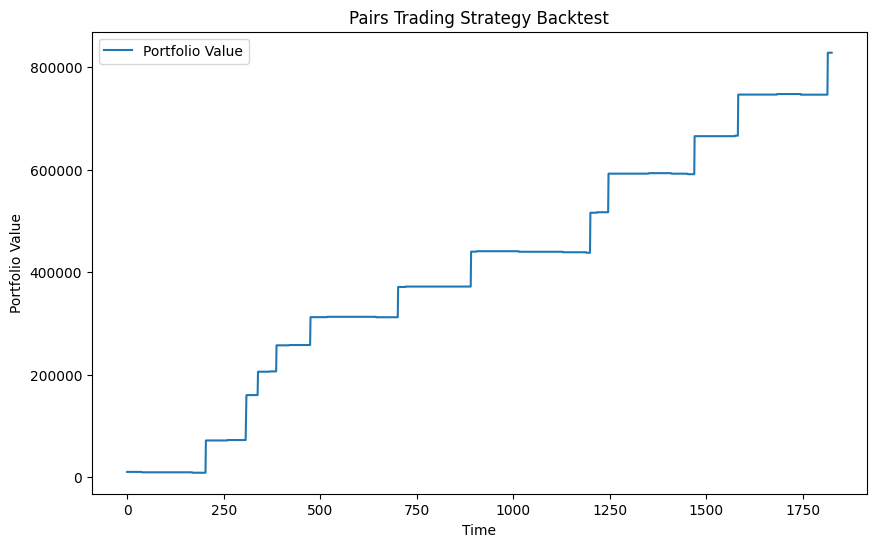

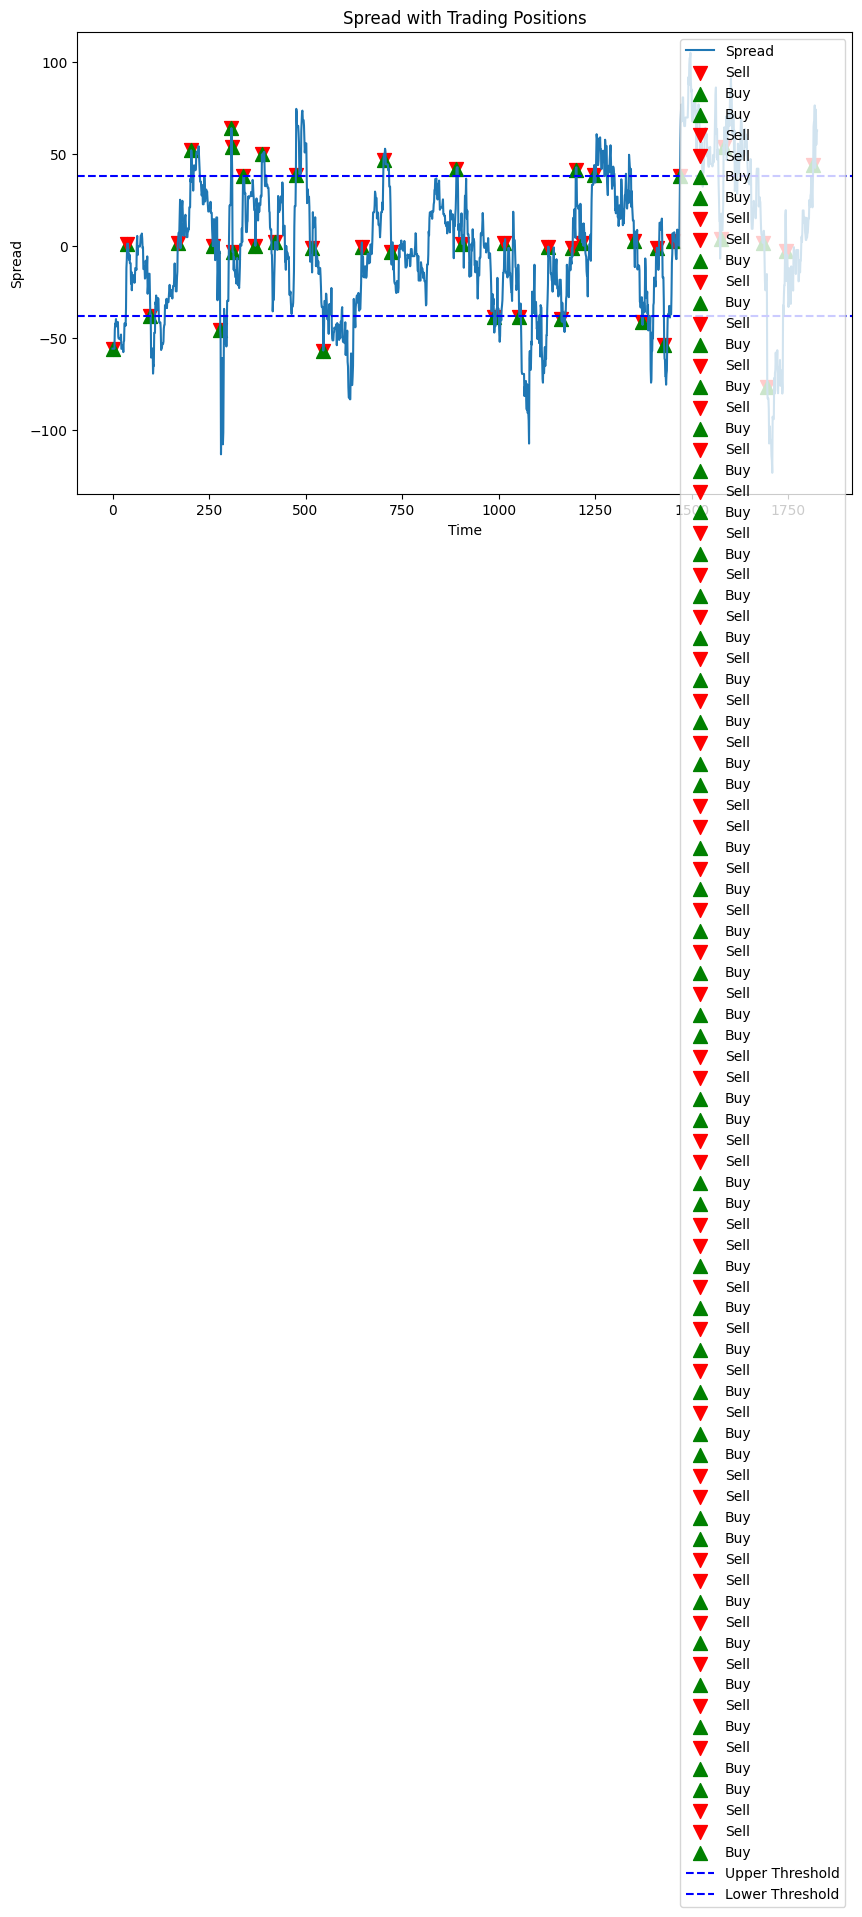

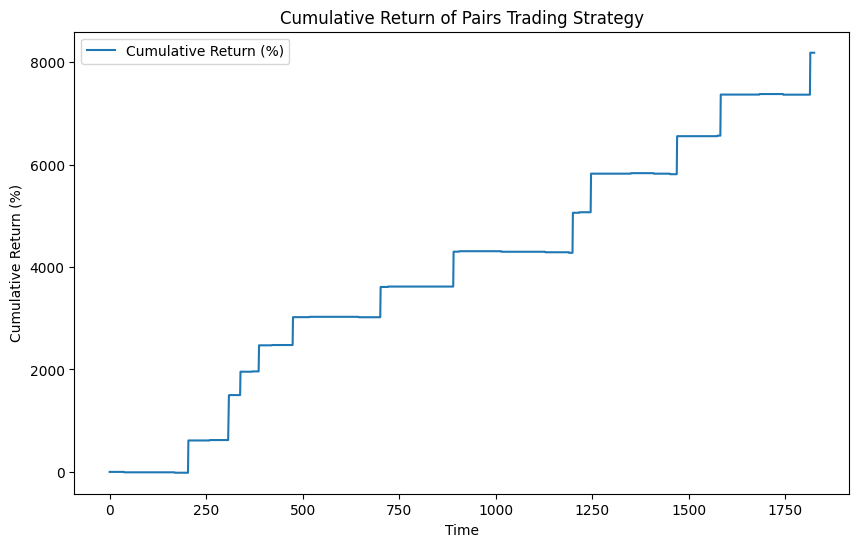

In [24]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

class PairsTradingStrategy:
    def __init__(self, stock1_name, stock2_name, stock1_prices, stock2_prices, threshold=1):
        self.stock1_name = stock1_name
        self.stock2_name = stock2_name
        self.stock1_prices = stock1_prices
        self.stock2_prices = stock2_prices
        self.threshold = threshold
        self.spread = self.calculate_spread(stock1_prices, stock2_prices)
        self.mean = np.mean(self.spread)
        self.std = np.std(self.spread)
        self.ratio = stock1_prices / stock2_prices
        self.positions = []
        self.cumulative_return = [0]
        self.portfolio_value = []
        self.open_positions = {stock1_name: 0, stock2_name: 0}

    def calculate_spread(self, stock1_prices, stock2_prices):
        X = stock1_prices.reshape(-1, 1)
        y = stock2_prices
        model = LinearRegression().fit(X, y)
        predicted = model.predict(X)
        spread = stock2_prices - predicted
        return spread
    
    def execute_trade(self, i):
        current_spread = self.spread[i]
        
        if current_spread > self.mean + self.threshold * self.std:
            if self.open_positions[self.stock1_name] <= 0 and self.open_positions[self.stock2_name] >= 0:
                self.positions.append(('sell', self.stock2_name, 100, i))
                self.positions.append(('buy', self.stock1_name, self.ratio[i] * 100, i))
                self.open_positions[self.stock1_name] += 100
                self.open_positions[self.stock2_name] -= self.ratio[i] * 100

                print(self.open_positions)

        elif current_spread < self.mean - self.threshold * self.std:
            if self.open_positions[self.stock1_name] >= 0 and self.open_positions[self.stock2_name] <= 0:
                self.positions.append(('sell', self.stock1_name, 100, i))
                self.positions.append(('buy', self.stock2_name, self.ratio[i] * 100, i))
                self.open_positions[self.stock1_name] -= 100
                self.open_positions[self.stock2_name] += self.ratio[i] * 100

                print(self.open_positions)
        
        elif abs(current_spread - self.mean) < 0.1 * self.std:
            if self.open_positions[self.stock1_name] > 0:
                self.positions.append(('sell', self.stock1_name, self.open_positions[self.stock1_name], i))
                self.positions.append(('buy', self.stock2_name, self.open_positions[self.stock2_name], i))
                self.open_positions[self.stock1_name] = 0
                self.open_positions[self.stock2_name] = 0

            elif self.open_positions[self.stock1_name] < 0:
                self.positions.append(('buy', self.stock1_name, -self.open_positions[self.stock1_name], i))
                self.positions.append(('sell', self.stock2_name, -self.open_positions[self.stock2_name], i))
                self.open_positions[self.stock1_name] = 0
                self.open_positions[self.stock2_name] = 0





    def backtest(self):
        initial_capital = 10000
        portfolio_value = initial_capital
        cumulative_returns = [0]

        for i in range(len(self.stock1_prices)):
            self.execute_trade(i)

            current_value = portfolio_value
            
            for position in self.positions:
                action, stock_name, amount, idx = position
                if stock_name == self.stock1_name:
                    price = self.stock1_prices[idx]
                elif stock_name == self.stock2_name:
                    price = self.stock2_prices[idx]

                if action == 'sell':
                    current_value += amount * price

                elif action == 'buy':
                    current_value -= amount * price

            self.portfolio_value.append(current_value)
            
            # Calculate cumulative return as percentage
            if len(self.portfolio_value) > 1:
                cumulative_return = ((self.portfolio_value[-1] - initial_capital) / initial_capital) * 100
                cumulative_returns.append(cumulative_return)

        self.cumulative_return = cumulative_returns
        return self.portfolio_value, self.positions


        

stock1_name = "DIB "
stock2_name = "MABANEE "
stock1_prices = np.array(cleaned_Data_Price[stock1_name])
stock2_prices = np.array(cleaned_Data_Price[stock2_name])

# Initialize strategy
strategy = PairsTradingStrategy(stock1_name, stock2_name, stock1_prices, stock2_prices)
portfolio_values, positions = strategy.backtest()

# Convert portfolio values to a pandas DataFrame for analysis
portfolio_df = pd.DataFrame(portfolio_values, columns=['Portfolio Value'])

# Plot the portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(portfolio_df['Portfolio Value'], label='Portfolio Value')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.title('Pairs Trading Strategy Backtest')
plt.legend()

# Plot spread with trading positions
plt.figure(figsize=(10, 6))
plt.plot(strategy.spread, label='Spread')
for position in positions:
    action, stock_name, amount, idx = position
    if action == 'buy':
        plt.scatter(idx, strategy.spread[idx], marker='^', color='g', label='Buy', s=100)
    elif action == 'sell':
        plt.scatter(idx, strategy.spread[idx], marker='v', color='r', label='Sell', s=100)
plt.axhline(y=strategy.mean + strategy.threshold * strategy.std, color='b', linestyle='--', label='Upper Threshold')
plt.axhline(y=strategy.mean - strategy.threshold * strategy.std, color='b', linestyle='--', label='Lower Threshold')
plt.xlabel('Time')
plt.ylabel('Spread')
plt.title('Spread with Trading Positions')
plt.legend()
plt.show()

# Plot cumulative return as percentage over time
plt.figure(figsize=(10, 6))
plt.plot(strategy.cumulative_return, label='Cumulative Return (%)')
plt.xlabel('Time')
plt.ylabel('Cumulative Return (%)')
plt.title('Cumulative Return of Pairs Trading Strategy')
plt.legend()
plt.show()



##STATISTICS##

Overall_Return = strategy.cumulative_return[-1]
Yearly_Return = strategy.cumulative_return[-1]/5


In [14]:
strategy.cumulative_return[-1]

315.8778236903014

With other stocks

{'ADAVIATI ': 100, 'ORDS ': -38.4083044982699}
{'ADAVIATI ': -100, 'ORDS ': 54.93562231759657}
{'ADAVIATI ': 100, 'ORDS ': -47.83904619970193}
{'ADAVIATI ': 0, 'ORDS ': 20.437926425096784}
{'ADAVIATI ': 100, 'ORDS ': -35.50266763430915}
{'ADAVIATI ': 100, 'ORDS ': -56.47921760391198}
{'ADAVIATI ': 0, 'ORDS ': 25.371316203917203}
{'ADAVIATI ': 100, 'ORDS ': -39.829448614438434}
{'ADAVIATI ': -100, 'ORDS ': 74.79387514723203}
{'ADAVIATI ': 100, 'ORDS ': -61.5546218487395}


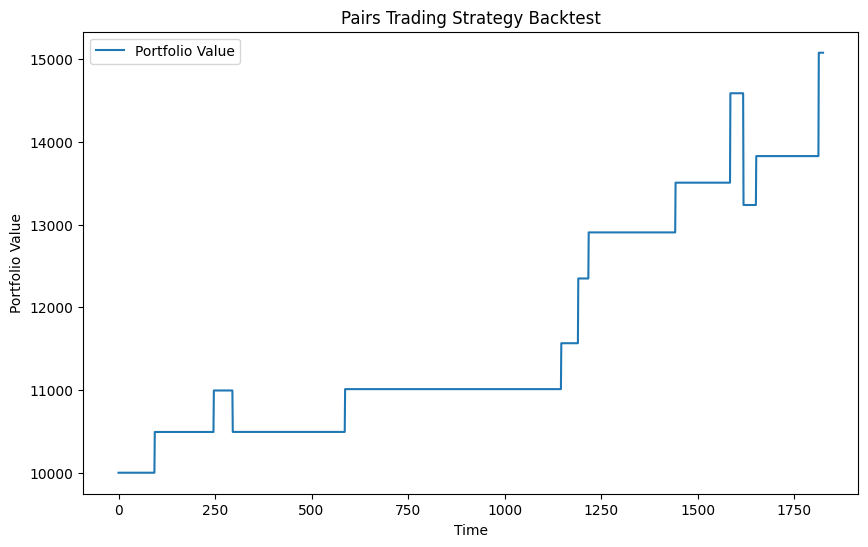

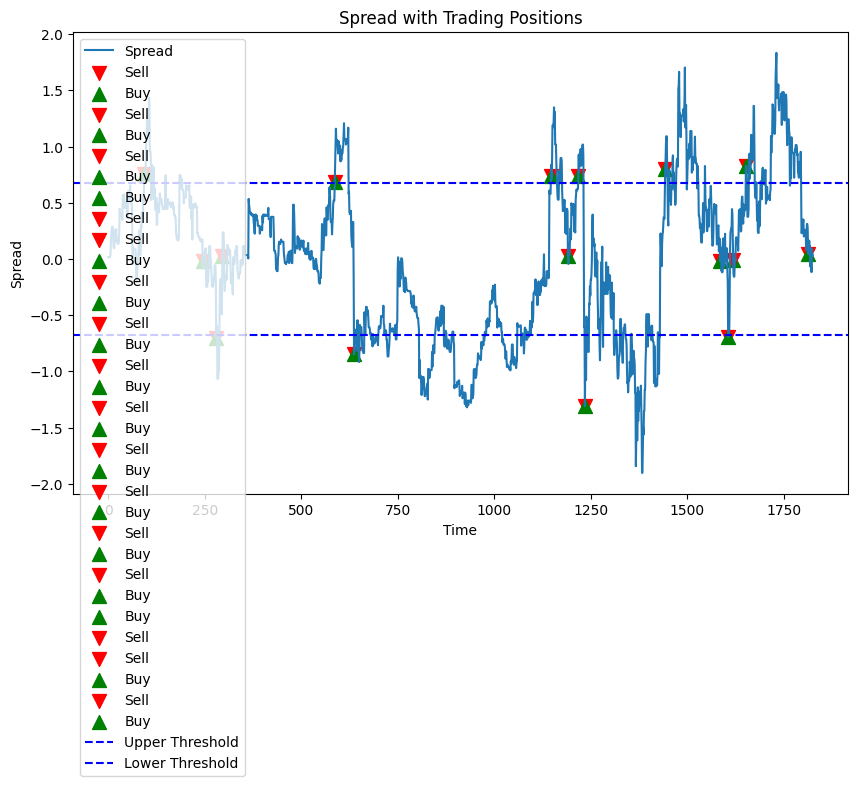

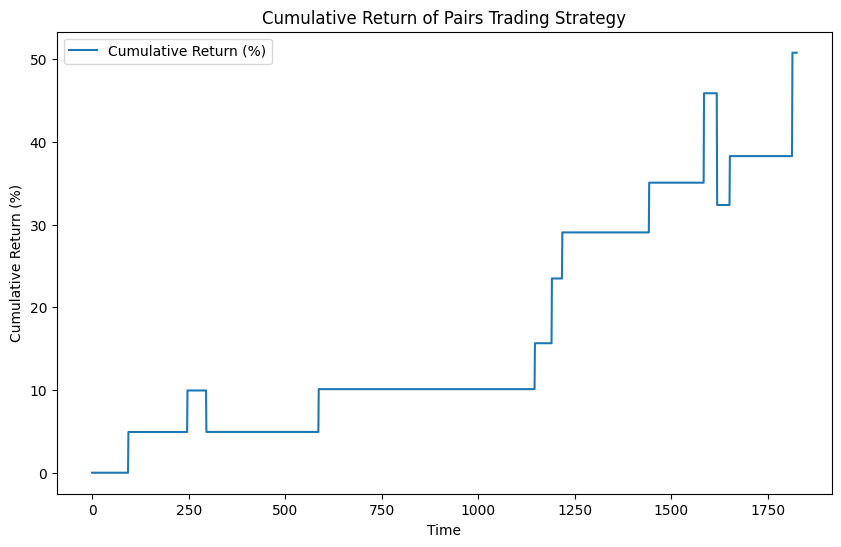

In [23]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

class PairsTradingStrategy:
    def __init__(self, stock1_name, stock2_name, stock1_prices, stock2_prices, threshold=1):
        self.stock1_name = stock1_name
        self.stock2_name = stock2_name
        self.stock1_prices = stock1_prices
        self.stock2_prices = stock2_prices
        self.threshold = threshold
        self.spread = self.calculate_spread(stock1_prices, stock2_prices)
        self.mean = np.mean(self.spread)
        self.std = np.std(self.spread)
        self.ratio = stock1_prices / stock2_prices
        self.positions = []
        self.cumulative_return = [0]
        self.portfolio_value = []
        self.open_positions = {stock1_name: 0, stock2_name: 0}

    def calculate_spread(self, stock1_prices, stock2_prices):
        X = stock1_prices.reshape(-1, 1)
        y = stock2_prices
        model = LinearRegression().fit(X, y)
        predicted = model.predict(X)
        spread = stock2_prices - predicted
        return spread
    
    def execute_trade(self, i):
        current_spread = self.spread[i]
        
        if current_spread > self.mean + self.threshold * self.std:
            if self.open_positions[self.stock1_name] <= 0 and self.open_positions[self.stock2_name] >= 0:
                self.positions.append(('sell', self.stock2_name, 100, i))
                self.positions.append(('buy', self.stock1_name, self.ratio[i] * 100, i))
                self.open_positions[self.stock1_name] += 100
                self.open_positions[self.stock2_name] -= self.ratio[i] * 100

                print(self.open_positions)

        elif current_spread < self.mean - self.threshold * self.std:
            if self.open_positions[self.stock1_name] >= 0 and self.open_positions[self.stock2_name] <= 0:
                self.positions.append(('sell', self.stock1_name, 100, i))
                self.positions.append(('buy', self.stock2_name, self.ratio[i] * 100, i))
                self.open_positions[self.stock1_name] -= 100
                self.open_positions[self.stock2_name] += self.ratio[i] * 100

                print(self.open_positions)
        
        elif abs(current_spread - self.mean) < 0.1 * self.std:
            if self.open_positions[self.stock1_name] > 0:
                self.positions.append(('sell', self.stock1_name, self.open_positions[self.stock1_name], i))
                self.positions.append(('buy', self.stock2_name, self.open_positions[self.stock2_name], i))
                self.open_positions[self.stock1_name] = 0
                self.open_positions[self.stock2_name] = 0

            elif self.open_positions[self.stock1_name] < 0:
                self.positions.append(('buy', self.stock1_name, -self.open_positions[self.stock1_name], i))
                self.positions.append(('sell', self.stock2_name, -self.open_positions[self.stock2_name], i))
                self.open_positions[self.stock1_name] = 0
                self.open_positions[self.stock2_name] = 0





    def backtest(self):
        initial_capital = 10000
        portfolio_value = initial_capital
        cumulative_returns = [0]

        for i in range(len(self.stock1_prices)):
            self.execute_trade(i)

            current_value = portfolio_value
            
            for position in self.positions:
                action, stock_name, amount, idx = position
                if stock_name == self.stock1_name:
                    price = self.stock1_prices[idx]
                elif stock_name == self.stock2_name:
                    price = self.stock2_prices[idx]

                if action == 'sell':
                    current_value += amount * price

                elif action == 'buy':
                    current_value -= amount * price

            self.portfolio_value.append(current_value)
            
            # Calculate cumulative return as percentage
            if len(self.portfolio_value) > 1:
                cumulative_return = ((self.portfolio_value[-1] - initial_capital) / initial_capital) * 100
                cumulative_returns.append(cumulative_return)

        self.cumulative_return = cumulative_returns
        return self.portfolio_value, self.positions


        

stock1_name = "ADAVIATI "
stock2_name = "ORDS "
stock1_prices = np.array(cleaned_Data_Price[stock1_name])
stock2_prices = np.array(cleaned_Data_Price[stock2_name])

# Initialize strategy
strategy = PairsTradingStrategy(stock1_name, stock2_name, stock1_prices, stock2_prices)
portfolio_values, positions = strategy.backtest()

# Convert portfolio values to a pandas DataFrame for analysis
portfolio_df = pd.DataFrame(portfolio_values, columns=['Portfolio Value'])

# Plot the portfolio value over time
plt.figure(figsize=(10, 6))
plt.plot(portfolio_df['Portfolio Value'], label='Portfolio Value')
plt.xlabel('Time')
plt.ylabel('Portfolio Value')
plt.title('Pairs Trading Strategy Backtest')
plt.legend()

# Plot spread with trading positions
plt.figure(figsize=(10, 6))
plt.plot(strategy.spread, label='Spread')
for position in positions:
    action, stock_name, amount, idx = position
    if action == 'buy':
        plt.scatter(idx, strategy.spread[idx], marker='^', color='g', label='Buy', s=100)
    elif action == 'sell':
        plt.scatter(idx, strategy.spread[idx], marker='v', color='r', label='Sell', s=100)
plt.axhline(y=strategy.mean + strategy.threshold * strategy.std, color='b', linestyle='--', label='Upper Threshold')
plt.axhline(y=strategy.mean - strategy.threshold * strategy.std, color='b', linestyle='--', label='Lower Threshold')
plt.xlabel('Time')
plt.ylabel('Spread')
plt.title('Spread with Trading Positions')
plt.legend()
plt.show()

# Plot cumulative return as percentage over time
plt.figure(figsize=(10, 6))
plt.plot(strategy.cumulative_return, label='Cumulative Return (%)')
plt.xlabel('Time')
plt.ylabel('Cumulative Return (%)')
plt.title('Cumulative Return of Pairs Trading Strategy')
plt.legend()
plt.show()



##STATISTICS##

Overall_Return = strategy.cumulative_return[-1]
Yearly_Return = strategy.cumulative_return[-1]/5
